In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
#speed of light 
c0 = 299792458 #(m/s)
n_2= 2.e-19 #(m^2/W)
om_1550 = 2*np.pi*c0/(1550.e-9) #angular frequency for 1550nm light
A_1550 = 1.73107e-12#mode area from Lumerical of the fundamental 1550nm TE mode (m^2)
om_1064 = 2*np.pi*c0/(1064.e-9) #angular frequency for 1064nm light
A_1064 = 0.582584e-12 #mode area from Lumerical of the fundamental 1064nm TE mode (m^2)

gam_1550=n_2*om_1550/(c0*A_1550) #nonlinear coefficient for 1550nm mode in 1/(m W)
gam_1064=n_2*om_1064/(c0*A_1064) #nonlinear coefficient for 1064nm mode in 1/(m W)
print(gam_1550)
print(gam_1064)

0.46834246334531376
2.027261081269995


[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


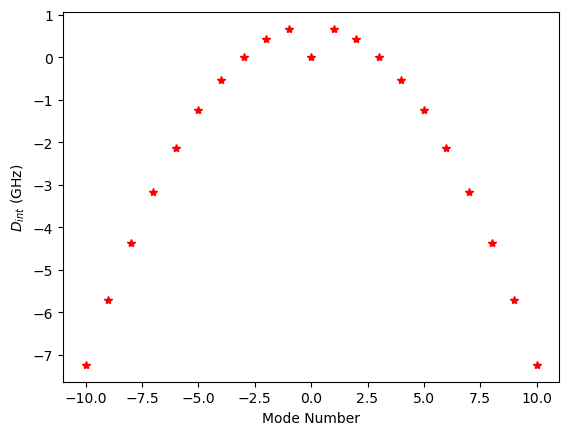

In [13]:
mu_b=-10
mu_t=10
mus=np.linspace(mu_b,mu_t,mu_t-mu_b+1)
print(mus)
#bragg splitting in Hz
BG=1.5*1e9
D_0=0
#FSR was about 1THz
D_1=240.5e9
#guessing D_2 here
D_2=159.68e6
v_pump=193.4144890323e12 #1550nm in THz
#constructing integrated dispersion
Dint=np.zeros(len(mus))
for i in range(len(mus)):
    if mus[i] in [0,-3,3]:
        Dint[i]=0.0
    else:
        Dint[i]=-D_2/2*mus[i]**2+BG/2+D_0
plt.plot(mus,Dint/1e9, "r*")
#plt.ylim([-5,5])
#plt.xlim([-20,20])
plt.xlabel("Mode Number")
plt.ylabel(r"$D_{int}$ (GHz)")
with open("Tantala_test_PhCr_Disp_1500MHz.csv","w") as csvfile:
    csvwriter=csv.writer(csvfile)
    for i in range(len(mus)):
        row=[mus[i],Dint[i]+D_1*mus[i]+v_pump]
        csvwriter.writerow(row)

    

In [9]:
print((371084056760649.44-370102256585805.6)/1e9)
print((100+549)/2)

981.8001748438126
324.5
